1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab 
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

train_data = pd.read_csv('/content/drive/MyDrive/HealthKathon/HealthKaton/sampling_healtkathon2022/sampling_healtkathon2022.csv')

1. Data Preparation

In [ ]:
print(train_data.head())

        id  id_peserta  dati2 typefaskes  usia jenkel  pisat  \
0   165666         486     17         KL    48      P    1.0   
1  1010828         520     17          A    63      L    1.0   
2   166042         523     17         KL    53      P    1.0   
3   168937         549     17         KL    54      P    1.0   
4  1005899         549     17          A    53      P    1.0   

                  tgldatang                 tglpulang  jenispel  ...  \
0  2018-07-25T17:00:00.000Z  2018-07-25T17:00:00.000Z         2  ...   
1  2019-05-27T17:00:00.000Z  2019-05-30T17:00:00.000Z         1  ...   
2  2019-07-16T17:00:00.000Z  2019-07-16T17:00:00.000Z         2  ...   
3  2019-10-17T17:00:00.000Z  2019-10-17T17:00:00.000Z         2  ...   
4  2018-04-18T17:00:00.000Z  2018-04-18T17:00:00.000Z         2  ...   

        biaya jenispulang         cbg  kelasrawat  kdsa  kdsp  kdsr  kdsi  \
0    184300.0         1.0    Q-5-42-0           3  None  None  None  None   
1  10628400.0         1.0  D

In [ ]:
print("Number of rows in training set: {}".format(len(train_data)))

Number of rows in training set: 11401882


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.9+ GB


In [ ]:
train_data.isnull().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041455
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

2. Data cleansing

In [ ]:
train_data = train_data.drop(['politujuan','tglpulang','tgldatang','id_peserta'], axis=1)

In [ ]:
train_data['kdsa'] = train_data['kdsa'].fillna('None')
train_data['kdsp'] = train_data['kdsp'].fillna('None')
train_data['kdsr'] = train_data['kdsr'].fillna('None')
train_data['kdsi'] = train_data['kdsi'].fillna('None')
train_data['kdsd'] = train_data['kdsd'].fillna('None')

In [ ]:
train_data['jenkel'].value_counts()

P    6161677
L    5240156
Name: jenkel, dtype: int64

In [ ]:
train_data['jenkel'] = train_data['jenkel'].fillna('P')

In [ ]:
train_data['pisat'].value_counts()

1.0    4874164
4.0    3350737
3.0    2474862
5.0     459397
2.0     242532
Name: pisat, dtype: int64

In [ ]:
train_data['pisat'] = train_data['pisat'].fillna(value=train_data['pisat'].median())

In [ ]:
train_data['diagfktp'].value_counts()

Z09.8    407556
R50.9    346635
P03.4    207769
Z03.8    201981
K30      183918
          ...  
D165          1
Q436          1
m05.9         1
D83.1         1
E73.1         1
Name: diagfktp, Length: 17012, dtype: int64

In [ ]:
train_data['diagfktp'] = train_data['diagfktp'].fillna('ZO9.8')

In [ ]:
train_data['biaya'].value_counts()

190400.0      551050
183300.0      234613
191800.0      208013
185000.0      183641
183500.0      183471
               ...  
60941100.0         1
6912000.0          1
3278520.0          1
6847400.0          1
24788800.0         1
Name: biaya, Length: 57854, dtype: int64

In [ ]:
train_data['biaya'] = train_data['biaya'].fillna(value=train_data['biaya'].mean())

In [ ]:
train_data['jenispulang'].value_counts()

1.0    10929593
2.0      185714
4.0      146116
5.0       86835
3.0       53585
Name: jenispulang, dtype: int64

In [ ]:
train_data['jenispulang'] = train_data['jenispulang'].fillna(value=train_data['jenispulang'].median())

In [ ]:
train_data.isnull().sum()

id             0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
jenispel       0
diagfktp       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
kdsa           0
kdsp           0
kdsr           0
kdsi           0
kdsd           0
label          0
dtype: int64

3. Exploratory Data Analysis(EDA)

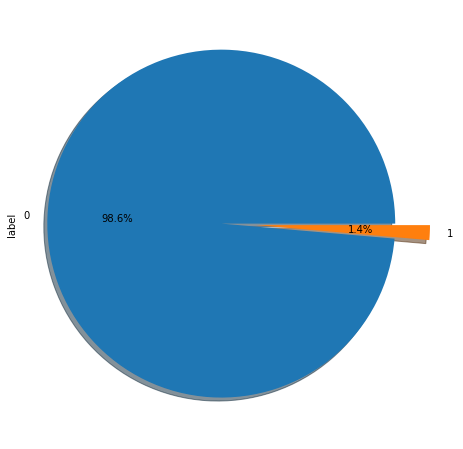

In [ ]:
# Pandas plotting with matplotlib
train_data['label'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

4. Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
typefaskes_le=LabelEncoder()
train_data['typefaskes']=typefaskes_le.fit_transform(train_data['typefaskes'])
jenkel_le=LabelEncoder()
train_data['jenkel']=jenkel_le.fit_transform(train_data['jenkel'])
diagfktp_le=LabelEncoder()
train_data['diagfktp']=diagfktp_le.fit_transform(train_data['diagfktp'])
cbg_le=LabelEncoder()
train_data['cbg']=cbg_le.fit_transform(train_data['cbg'])
kdsa_le=LabelEncoder()
train_data['kdsa']=kdsa_le.fit_transform(train_data['kdsa'])
kdsp_le=LabelEncoder()
train_data['kdsp']=kdsp_le.fit_transform(train_data['kdsp'])
kdsr_le=LabelEncoder()
train_data['kdsr']=kdsr_le.fit_transform(train_data['kdsr'])
kdsi_le=LabelEncoder()
train_data['kdsi']=kdsi_le.fit_transform(train_data['kdsi'])
kdsd_le=LabelEncoder()
train_data['kdsd']=kdsd_le.fit_transform(train_data['kdsd'])

In [ ]:
train_data.shape

(11401882, 18)

In [ ]:
train_data.nunique()

id             11401868
dati2               489
typefaskes           26
usia                111
jenkel                2
pisat                 5
jenispel              2
diagfktp          17013
biaya             57855
jenispulang           5
cbg                1034
kelasrawat            3
kdsa                 36
kdsp                 13
kdsr                  6
kdsi                  4
kdsd                 12
label                 2
dtype: int64

In [ ]:
typefaskes_le.classes_

array(['A', 'B', 'C', 'D', 'GD', 'HD', 'I1', 'I2', 'I3', 'I4', 'KB', 'KC',
       'KG', 'KI', 'KJ', 'KK', 'KL', 'KM', 'KO', 'KP', 'KT', 'KU', 'SA',
       'SB', 'SC', 'SD'], dtype=object)

In [ ]:
kdsa_le.classes_

array(['None', 'SA-4-14-I', 'SA-4-14-II', 'SA-4-14-X', 'SF-4-10-I',
       'SF-4-10-II', 'SF-4-10-III', 'SF-4-10-IV', 'SF-4-10-X',
       'SF-4-11-I', 'SF-4-11-II', 'SF-4-11-III', 'SF-4-11-IV',
       'SF-4-12-II', 'SF-4-13-I', 'SF-4-13-II', 'SF-4-13-III',
       'SF-4-13-IV', 'SF-4-13-X', 'SF-4-15-I', 'SF-4-15-II',
       'SF-4-15-III', 'SF-4-15-IV', 'SF-4-15-X', 'SF-4-16-I',
       'SF-4-16-II', 'SF-4-16-III', 'SF-4-16-IV', 'SF-4-16-X',
       'SF-4-18-I', 'SF-4-19-I', 'SF-4-19-II', 'SF-4-19-III',
       'SF-4-19-IV', 'ST-1-10-III', 'ST-4-11-II'], dtype=object)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   dati2        int64  
 2   typefaskes   int64  
 3   usia         int64  
 4   jenkel       int64  
 5   pisat        float64
 6   jenispel     int64  
 7   diagfktp     int64  
 8   biaya        float64
 9   jenispulang  float64
 10  cbg          int64  
 11  kelasrawat   int64  
 12  kdsa         int64  
 13  kdsp         int64  
 14  kdsr         int64  
 15  kdsi         int64  
 16  kdsd         int64  
 17  label        int64  
dtypes: float64(3), int64(15)
memory usage: 1.5 GB


In [ ]:
train_data.corr()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
id,1.000000,0.527575,-0.435517,0.011832,-0.029845,0.003255,-0.038642,0.001059,0.057262,0.037123,-0.054834,-0.003628,0.016594,-0.020629,0.005029,0.003371,-0.033926,0.002648
dati2,0.527575,1.000000,-0.069073,0.000736,0.001284,0.000734,0.008881,0.018917,-0.030162,-0.006446,0.017375,-0.003250,-0.003928,-0.002052,-0.004646,0.003329,0.015144,0.007179
typefaskes,-0.435517,-0.069073,1.000000,0.023883,0.029492,-0.017252,0.028779,-0.020574,-0.068315,-0.058802,0.038611,-0.043213,0.002698,0.026061,-0.004634,-0.009404,0.057434,-0.010546
usia,0.011832,0.000736,0.023883,1.000000,0.044876,-0.570096,0.113925,-0.144909,-0.043988,0.029344,-0.051738,0.011967,0.000477,0.071857,0.026820,-0.013192,0.095534,-0.011001
jenkel,-0.029845,0.001284,0.029492,0.044876,1.000000,0.163890,-0.020707,0.007303,-0.023186,-0.018430,0.066883,-0.009578,-0.016126,-0.004238,0.007305,-0.000662,0.041641,-0.003613
pisat,0.003255,0.000734,-0.017252,-0.570096,0.163890,1.000000,-0.091605,0.075994,0.032467,-0.010620,0.011325,0.015171,0.005053,-0.034609,-0.007525,0.010283,-0.046337,0.007745
jenispel,-0.038642,0.008881,0.028779,0.113925,-0.020707,-0.091605,1.000000,-0.098185,-0.446023,-0.079056,0.413078,0.527171,-0.038210,0.035052,-0.032212,-0.021354,0.005421,0.003210
diagfktp,0.001059,0.018917,-0.020574,-0.144909,0.007303,0.075994,-0.098185,1.000000,0.047878,0.018864,0.160578,-0.049087,-0.026607,-0.036515,0.019248,-0.003978,0.090302,0.006235
biaya,0.057262,-0.030162,-0.068315,-0.043988,-0.023186,0.032467,-0.446023,0.047878,1.000000,0.129667,-0.213556,-0.316611,0.051337,0.132897,0.194122,-0.004965,-0.101513,0.003317
jenispulang,0.037123,-0.006446,-0.058802,0.029344,-0.018430,-0.010620,-0.079056,0.018864,0.129667,1.000000,-0.064960,-0.025196,-0.003452,-0.007800,0.001615,-0.000096,0.004123,-0.002402


In [ ]:
train_data.head()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,17,16,48,1,1.0,2,5472,184300.0,1.0,825,3,0,0,0,3,11,0
1,1010828,17,0,63,0,1.0,1,11656,10628400.0,1.0,106,1,0,0,0,3,11,0
2,166042,17,16,53,1,1.0,2,2210,187300.0,1.0,827,3,0,0,0,3,11,0
3,168937,17,16,54,1,1.0,2,3877,187300.0,1.0,827,3,0,0,0,3,11,0
4,1005899,17,0,53,1,1.0,2,7637,381600.0,1.0,827,3,0,0,0,3,11,0


5. Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
minority_class_len = len(train_data[train_data.label == 1])
print(minority_class_len)

156889


In [ ]:
majority_class_indices = train_data[train_data.label == 0].index
print(majority_class_indices)

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            11401872, 11401873, 11401874, 11401875, 11401876, 11401877,
            11401878, 11401879, 11401880, 11401881],
           dtype='int64', length=11244993)


In [ ]:
random_majority_indices=np.random.choice(majority_class_indices,
                                         minority_class_len,
                                         replace=False
                                         )
print(len(random_majority_indices))

156889


In [ ]:
minority_class_indices=train_data[train_data['label'] == 1].index
print(minority_class_indices)

Int64Index([      20,      144,      239,      260,      316,      428,
                 514,      529,      677,      708,
            ...
            11401122, 11401153, 11401168, 11401214, 11401217, 11401308,
            11401331, 11401562, 11401772, 11401854],
           dtype='int64', length=156889)


In [ ]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample=train_data.loc[under_sample_indices]
under_sample

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
20,998748,17,0,56,0,1.0,2,4184,809200.0,1.0,812,3,0,0,0,3,11,1
144,1009373,17,0,22,0,4.0,1,12109,24291100.0,1.0,589,1,0,0,0,3,11,1
239,1052405,17,1,59,0,1.0,2,4122,532900.0,1.0,812,3,0,0,0,3,11,1
260,1226,1,25,41,1,3.0,2,4119,525700.0,3.0,812,3,0,0,0,3,11,1
316,1320238,10,2,50,0,1.0,2,1713,183500.0,1.0,827,3,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638394,3187911,170,14,37,1,3.0,1,14886,2148600.0,1.0,998,1,0,0,0,3,11,0
8531889,2420018,133,24,55,1,3.0,2,2230,190400.0,1.0,827,3,0,0,0,3,11,0
7243938,9000226,217,23,4,0,4.0,1,11763,2987000.0,1.0,104,3,0,0,0,3,11,0
516169,308978,38,23,22,1,4.0,2,9991,146100.0,1.0,806,3,0,0,0,3,11,0


In [ ]:
under_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313778 entries, 20 to 1724337
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           313778 non-null  int64  
 1   dati2        313778 non-null  int64  
 2   typefaskes   313778 non-null  int64  
 3   usia         313778 non-null  int64  
 4   jenkel       313778 non-null  int64  
 5   pisat        313778 non-null  float64
 6   jenispel     313778 non-null  int64  
 7   diagfktp     313778 non-null  int64  
 8   biaya        313778 non-null  float64
 9   jenispulang  313778 non-null  float64
 10  cbg          313778 non-null  int64  
 11  kelasrawat   313778 non-null  int64  
 12  kdsa         313778 non-null  int64  
 13  kdsp         313778 non-null  int64  
 14  kdsr         313778 non-null  int64  
 15  kdsi         313778 non-null  int64  
 16  kdsd         313778 non-null  int64  
 17  label        313778 non-null  int64  
dtypes: float64(3), int64(1

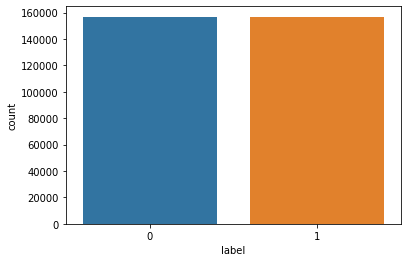

In [ ]:
sns.countplot(x='label',data=under_sample)

In [ ]:
X = under_sample.drop(columns = ['label','id'])
y = under_sample['label']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
X_train.shape[0], X_test.shape[0]

(251022, 62756)

In [ ]:
# Create a results dataframe to store and later compare results
results = pd.DataFrame()
results['Metrics'] = ['True Negatives', 'False Negatives', 'False Positives', 'True Positives', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support']

def get_metrics(labels, pred_labels):
    conf_matrix = np.asarray(confusion_matrix(labels, pred_labels))
    metrics = np.concatenate(([accuracy_score(labels, pred_labels)], precision_recall_fscore_support(labels, pred_labels, average='binary')))
    return np.concatenate((conf_matrix.reshape(-1),metrics))

def fit_model(input_data, model_fn, model_args=None, threshold=None, labels=None):
    return model_fn(input_data, model_args, threshold, labels)

def predict_model(input_data, model, predict_fn, threshold=None):
    return predict_fn(input_data, model, threshold)

In [ ]:
from sklearn.ensemble import IsolationForest
def fit_isolation_forest(input_data, args=None, threshold=None, labels=None):
    if threshold == None:
        model = IsolationForest()
    else:
        model = IsolationForest(contamination=threshold)
    
    model.fit(input_data)

    return model

def predict_isolation_forest(input_data, model, threshold=None):
    y_pred = model.predict(input_data)
    y_pred = [1 if pred == -1 else 0 for pred in y_pred]

    return y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, mean_squared_error
if_model = fit_model(X_train, fit_isolation_forest, None)

y_pred_test = predict_model(X_test, if_model, predict_isolation_forest)
print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

CONFUSION MATRIX:
 [[23805  7476]
 [24657  6818]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.76      0.60     31281
           1       0.48      0.22      0.30     31475

    accuracy                           0.49     62756
   macro avg       0.48      0.49      0.45     62756
weighted avg       0.48      0.49      0.45     62756



In [ ]:
from sklearn.mixture import GaussianMixture
def fit_gaussian_mixture(input_data, args=None, threshold=None, labels=None):
    if threshold == None:
        model = GaussianMixture(n_components=2)
    else:
        model = GaussianMixture(n_components=2, reg_covar=threshold)
    
    model.fit(input_data)

    return model

def predict_gaussian_mixture(input_data, model, threshold=None):
    return model.predict(input_data)

In [ ]:
gm_model = fit_model(X_train, fit_gaussian_mixture, None)

y_pred_test = predict_model(X_test, gm_model, predict_gaussian_mixture)
print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

CONFUSION MATRIX:
 [[20291 10990]
 [21121 10354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.65      0.56     31281
           1       0.49      0.33      0.39     31475

    accuracy                           0.49     62756
   macro avg       0.49      0.49      0.48     62756
weighted avg       0.49      0.49      0.47     62756



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, mean_squared_error, recall_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
def fit_autoencoder(input_data, args, threshold=None, labels=None):
    ss = StandardScaler()
    X_tscaled = ss.fit_transform(input_data.values)
    X_fit = pd.DataFrame(X_tscaled, columns=input_data.columns, index=input_data.index)

    # input
    inp = Input(shape=(X_fit.shape[1],))

    # Encoder
    x = Dense(100, activation='relu')(inp)
    x = Dense(50, activation='relu')(x)

    # Decoder
    x = Dense(50, activation='tanh')(x)
    x = Dense(100, activation='tanh')(x)

    ## output
    output = Dense(X_fit.shape[1], activation='relu')(x)

    autoencoder = Model(inp, output)

    lr = args[0]
    epochs = args[1]
    adam = Adam(lr=lr, decay=(lr/epochs))

    autoencoder.compile(optimizer=adam, loss="mean_squared_error")

    autoencoder.fit(X_fit.values, X_fit.values, batch_size=2048, epochs=epochs,
                          shuffle=True, verbose=0)
    encoder = Sequential()
    encoder.add(autoencoder.layers[0])
    encoder.add(autoencoder.layers[1])
    encoder.add(autoencoder.layers[2])

    decoder = Sequential()
    decoder.add(autoencoder.layers[3])
    decoder.add(autoencoder.layers[4])
    decoder.add(autoencoder.layers[5])

    return (encoder, decoder)

def get_autoencoder_rc_scores(input_data, model):
    ss = StandardScaler()
    X_tscaled = ss.fit_transform(input_data.values)
    X_fit = pd.DataFrame(X_tscaled, columns=input_data.columns, index=input_data.index)

    encoded_data = model[0].predict(X_fit)
    decoded_data = model[1].predict(encoded_data)

    decoded_df = pd.DataFrame(decoded_data, columns=X_fit.columns, index=X_fit.index)

    reconstruction_scores = []
    for idx in X_fit.index:
        score = mean_squared_error(X_fit.loc[idx], decoded_df.loc[idx])
        reconstruction_scores.append(score)
        
    rc_scores = pd.DataFrame(reconstruction_scores, index=X_fit.index, columns=['reconstruction_score']).sort_values(by='reconstruction_score', ascending=False)

    return rc_scores

def predict_autoencoder(input_data, model, threshold=None):
    rc_scores = get_autoencoder_rc_scores(input_data, model)

    if threshold == None:
        rec_median = rc_scores['reconstruction_score'].median()
        rec_std = rc_scores['reconstruction_score'].std()

        default_threshold = rec_median + 2*rec_std
        score_filter = rc_scores > default_threshold
    else:
        score_filter = rc_scores > threshold

    top_scores_idx = rc_scores[score_filter].dropna().index

    pred = np.zeros(len(input_data))
   
    for x in top_scores_idx:
        pred[x] = 1

    return pred

In [ ]:
args = [0.0001, 300] # the fit function takes 2 arguments: lr (set to 0.0001) and epochs (set to 300)
ae_model = fit_model(X_train, fit_autoencoder, args)

y_pred_test = predict_model(X_test, ae_model, predict_autoencoder)
print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

IndexError: ignored

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=10, n_jobs=-1)

In [ ]:
val2=train_data.drop(columns = ['label','id'])
valy=train_data['label']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = DecisionTree_model.predict(val2)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
tn, fp , fn, tp = confusion_matrix(valy, y_pred).ravel()

plt.figure(figsize = (5,3)) 
sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0], yticklabels = [1,0], annot = True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

ValueError: ignored

In [ ]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(valy, pred))
print('Recall score : ',recall_score(valy, y_pred))
print('Precision score : ',precision_score(valy, y_pred))
print('F1 score : ',f1_score(valy, y_pred))

6. Evaluation

In [ ]:
test_data=pd.read_csv('/content/sampling2_healthkathon2022_sep.csv')

In [ ]:
print(test_data.head())

In [ ]:
print("Number of rows in training set: {}".format(len(test_data)))

In [ ]:
test_data.info()

In [ ]:
test_data.duplicated().sum()

In [ ]:
test_data.isnull().sum()

2. Data cleansing

In [ ]:
test_data['kdsa'].value_counts()

In [ ]:
test_data['kdsa'] = test_data['kdsa'].fillna('None')
test_data['kdsp'] = test_data['kdsp'].fillna('None')
test_data['kdsr'] = test_data['kdsr'].fillna('None')
test_data['kdsi'] = test_data['kdsi'].fillna('None')
test_data['kdsd'] = test_data['kdsd'].fillna('None')

In [ ]:
test_data['jenkel'].value_counts()

In [ ]:
test_data['jenkel'] = test_data['jenkel'].fillna('P')

In [ ]:
test_data['pisat'].value_counts()

In [ ]:
test_data['pisat'] = test_data['pisat'].fillna(1.0)

In [ ]:
test_data['politujuan'].value_counts()

In [ ]:
test_data['diagfktp'].value_counts()

In [ ]:
test_data['diagfktp'] = test_data['diagfktp'].fillna('ZO9.8')

In [ ]:
test_data['biaya'].value_counts()

In [ ]:
test_data['biaya'] = test_data['biaya'].fillna(value=test_data['biaya'].mean())

In [ ]:
test_data['jenispulang'].value_counts()

In [ ]:
test_data['jenispulang'] = test_data['jenispulang'].fillna(1.0)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data = test_data.drop(['politujuan','tglpulang','tgldatang','id_peserta'], axis=1)

In [ ]:
test_data

3. Exploratory Data Analysis(EDA)

4. Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
typefaskes_le=LabelEncoder()
test_data['typefaskes']=typefaskes_le.fit_transform(test_data['typefaskes'])
jenkel_le=LabelEncoder()
test_data['jenkel']=jenkel_le.fit_transform(test_data['jenkel'])
diagfktp_le=LabelEncoder()
test_data['diagfktp']=diagfktp_le.fit_transform(test_data['diagfktp'])
cbg_le=LabelEncoder()
test_data['cbg']=cbg_le.fit_transform(test_data['cbg'])
kdsa_le=LabelEncoder()
test_data['kdsa']=kdsa_le.fit_transform(test_data['kdsa'])
kdsp_le=LabelEncoder()
test_data['kdsp']=kdsp_le.fit_transform(test_data['kdsp'])
kdsr_le=LabelEncoder()
test_data['kdsr']=kdsr_le.fit_transform(test_data['kdsr'])
kdsi_le=LabelEncoder()
test_data['kdsi']=kdsi_le.fit_transform(test_data['kdsi'])
kdsd_le=LabelEncoder()
test_data['kdsd']=kdsd_le.fit_transform(test_data['kdsd'])

In [ ]:
test_data.info()

In [ ]:
test_data.corr()

In [ ]:
test_data.head()

In [ ]:
x_test= test_data.drop(['id'], axis=1)

In [ ]:
test_pred = rf.predict(x_test)

In [ ]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(y_test, y_pred))
print('Recall score : ',recall_score(y_test, y_pred))
print('Precision score : ',precision_score(y_test, y_pred))
print('F1 score : ',f1_score(y_test, y_pred))

In [ ]:
test_pred

In [ ]:
id=test_data['id']

In [ ]:
hasil=pd.DataFrame({"id":id,"label":test_pred})
hasil

In [ ]:
hasil.to_csv('/content/drive/MyDrive/HealthKathon/HealthKaton/hasil.csv', index = False)